# 数理统计第一次大作业

### SY2201230 王昌锐

已知：Z = PX + (1 - P)Y，P ~ U[0,1]，X ~ N(-3,4)，Y ~ N(2,4)，X、Y、P相互独立，数值计算近似求解：

        蒙特卡罗模拟（方法），也称为计算机随机模拟方法、统计模拟法、统计试验法，是基于”随机数“的计算方法，或者是说把概率现象作为研究对象的数值模拟方法。其数学基础是大数定律与中心极限定理。其基本思想是：为了求解问题，先建立一个概率模型或随机过程，再通过对过程的观察或抽样试验来计算参数或数字特征。最后求出解的近似值。
        本次作业用numpy.random()函数随机生成了一百万个点模拟待求分布。首先将这些点分成250个区间，绘制归一化后的直方图作为概率密度函数PDF的近似。然后用样本均值和样本标准差作为参数拟合了一条正态分布曲线，发现除了期望值附近都能较好的拟合。然后将直方图每个区间的值用np.cumsum()函数累加，就可以算出蒙特卡洛模拟的概率分布曲线CDF。获得了两条曲线后，容易求出其期望、方差和0.9分位点。

（1）绘制z的概率分布/密度函数图像；

    图见文末

（2）求z的0.9分位点的值；

    如图所示，z的0.9分位点的值为2.270

（3）求z的期望和方差；

    如图所示，z的期望和方差分别为-0.501和4.752

In [1]:
# 导入需要的库
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"] # 解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False # 正常显示负号

dataPoints = 1000000 # 选取数据点，点越多越精确

P = np.random.rand(dataPoints) # 均匀分布
X = np.random.normal(-3, 2, dataPoints) # 正态分布
Y = np.random.normal(2, 2, dataPoints) # 正态分布
distri_of_Monte = P * X + (1 - P) * Y # 待求分布
mu = np.mean(distri_of_Monte) # 待求分布的期望值
sigma = np.std(distri_of_Monte) # 待求分布的标准差
sigma2 = np.var(distri_of_Monte) # 待求分布的方差
per = np.percentile(distri_of_Monte, 90, interpolation='midpoint') # 待求分布的0.9分位点

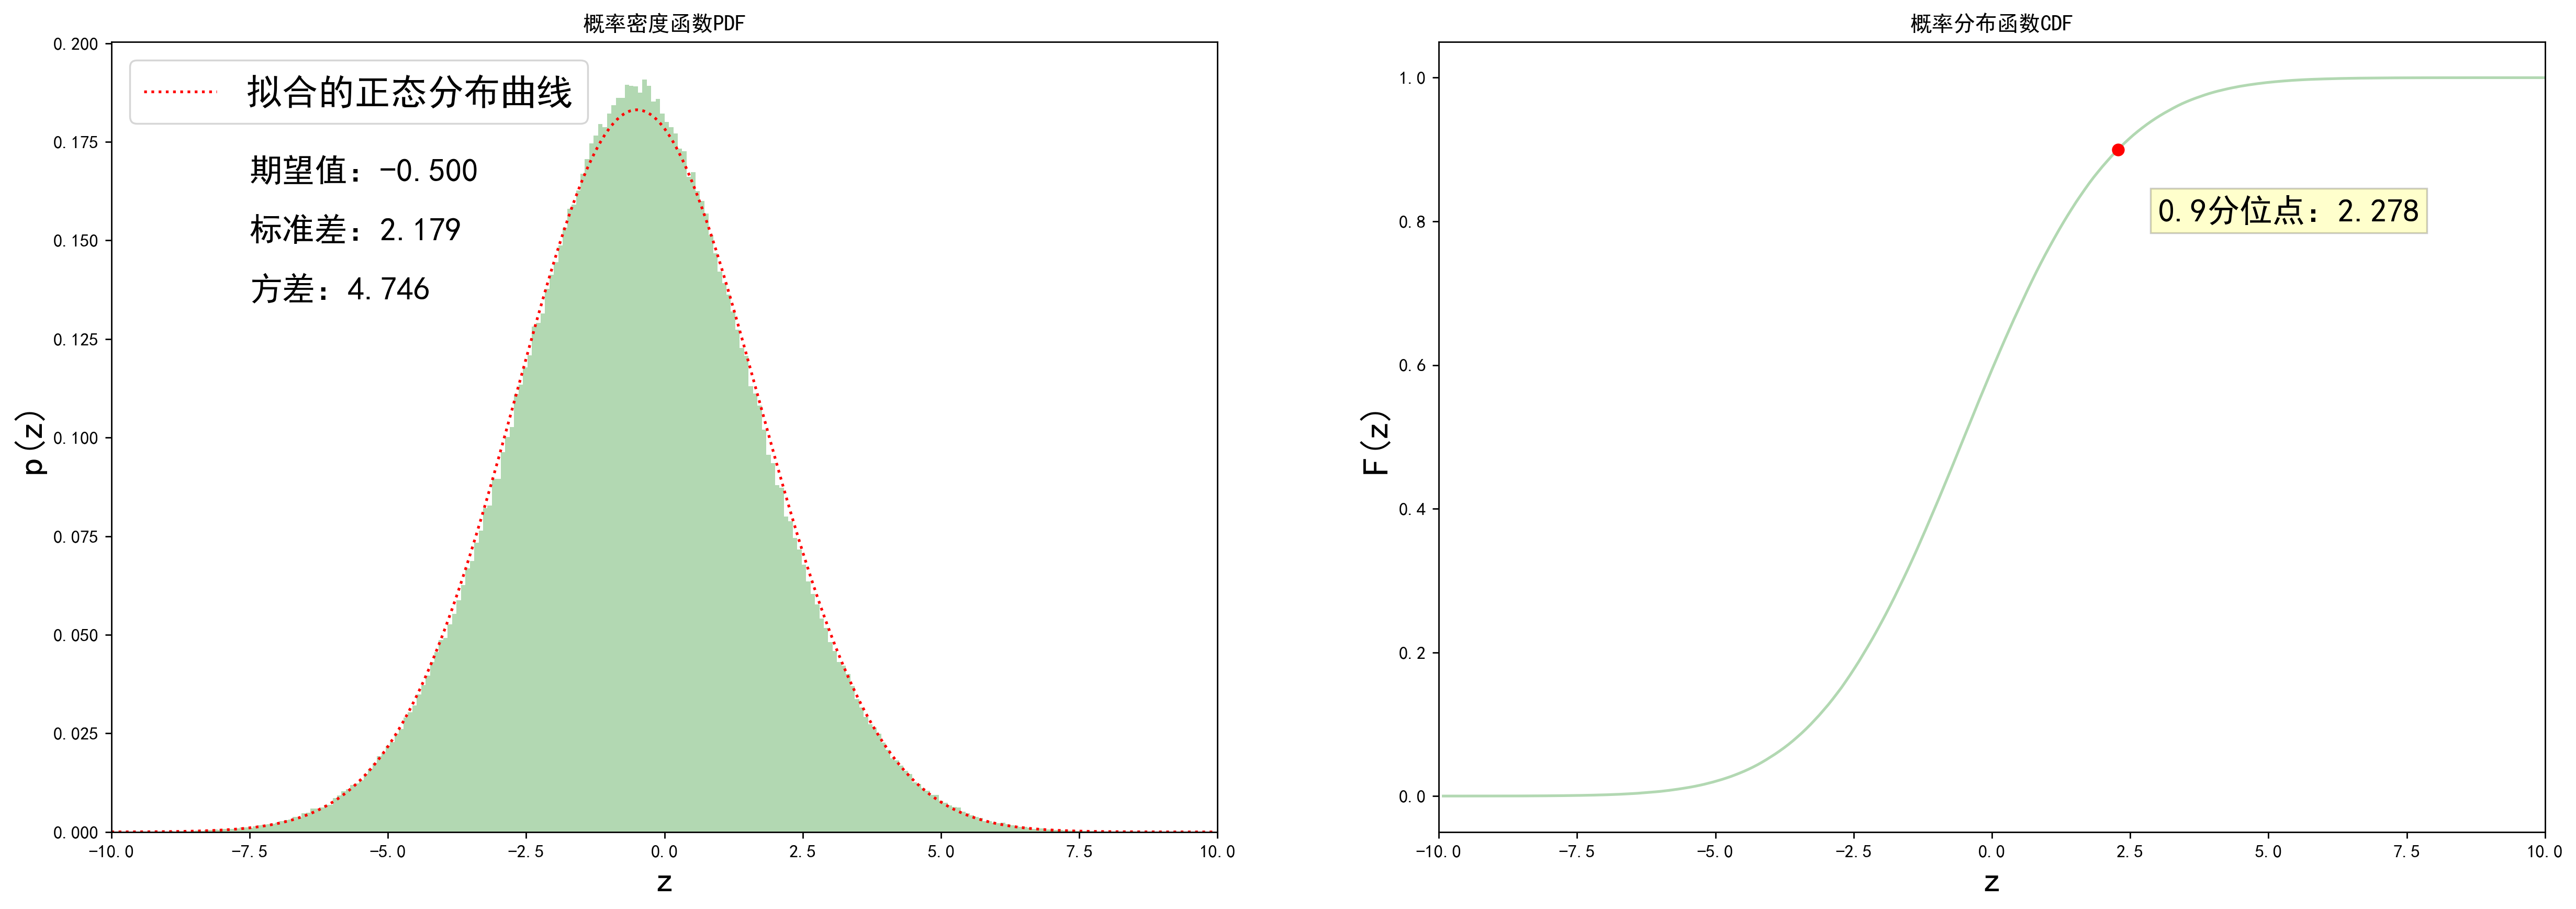

In [2]:
# 设置图形窗口
plt.figure('Figure Object1', # 图形对象名称窗口左上角显示
            figsize = (24,8), # 窗口大小
            dpi = 250, # 分辨率
          )

# 选择左子图绘制归一化后的直方图，即概率密度函数PDF
plt.subplot(1, 2, 1)
plt.hist(distri_of_Monte, bins=250, range=(-10, 10), density=True, facecolor='green', alpha=0.3)
x = np.arange(-10, 10, 0.01)
y = stats.norm(loc=mu, scale=sigma) # 拟合正态分布曲线y
plt.plot(x, y.pdf(x), ':r', label='拟合的正态分布曲线')
# 插入描述文本
t1 = '期望值：' + str(format(mu, '.3f'))
t2 = '标准差：' + str(format(sigma, '.3f'))
t3 = '方差：' + str(format(sigma2, '.3f'))
plt.text(-7.5, 0.165, t1, fontsize=18)
plt.text(-7.5, 0.150, t2, fontsize=18)
plt.text(-7.5, 0.135, t3, fontsize=18)
plt.xlabel('z', fontsize=20)
plt.xlim(-10, 10)
plt.ylabel('p(z)', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.title('概率密度函数PDF')

# 选择右子图绘制概率分布函数CDF
plt.subplot(1, 2, 2)
hist, bin_edges = np.histogram(distri_of_Monte, bins=250, range=(-10, 10)) # 返回直方图每个区间的值
hist_list = np.cumsum(hist) / dataPoints # 将直方图每个区间的值进行 np.cumsum() 函数累加，就可以算出蒙特卡洛模拟的概率分布
plt.plot(bin_edges[1:], hist_list, 'g', alpha=0.3) # 绘制概率分布函数
# 绘制0.9分位点并插入描述文本
plt.plot(per, 0.9, 'ro')
t4 = '0.9分位点：' + str(format(per, '.3f'))
plt.text(3, 0.8, t4, fontsize=18, bbox={'facecolor': 'yellow', 'alpha': 0.2})
plt.xlabel('z', fontsize=20)
plt.xlim(-10, 10)
plt.ylabel('F(z)', fontsize=20)
plt.title('概率分布函数CDF')
plt.show()
# plt.savefig(path) # 保存图片

## 给胡京京同学的纠错部分

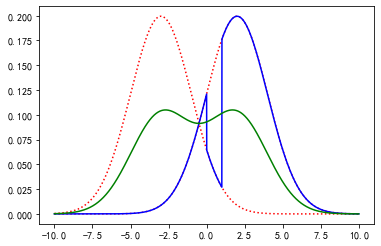

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x = np.arange(-10, 10, 0.001)
p = stats.uniform(loc=0, scale=1)
y1 = stats.norm(loc=-3, scale=2)
y2 = stats.norm(loc=2, scale=2)
y = p.pdf(x) * y1.pdf(x) + (1-p.pdf(x)) * y2.pdf(x)
y_1 = 0.5 * y1.pdf(x) + 0.5 * y2.pdf(x)

# plt.plot(x, p.pdf(x), ':r')
plt.plot(x, y1.pdf(x), ':r')
plt.plot(x, y2.pdf(x), ':r')
plt.plot(x, y, 'b')
plt.plot(x, y_1, 'g')

plt.show()

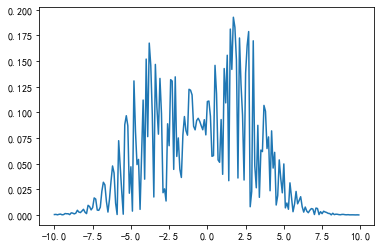

In [4]:
#定义正态分布函数
def nf(x,mu,sigma):
    return (1/(((2*np.pi)**(0.5))*sigma))*np.exp((-(x-mu)**2)/(2*(sigma**2)))

#定义分布函数返回序列
def fenbu(a,b,step):
    z = list()
    for i in np.arange(a,b,step):
        p = np.random.rand()
        z.append(p*nf(i,-3,2)+(1-p)*nf(i,2,2))
#         z.append(nf(i,-3,2))
    return z

start = -10
stop = -start
step = 0.1

z = fenbu(start,stop,step)

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(np.arange(start,stop,step),z)
plt.show()

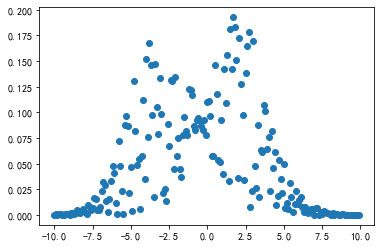

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.scatter(np.arange(start,stop,step),z)
plt.show()